<a href="https://colab.research.google.com/github/sophiahoeller/Data-Viz/blob/main/Data_Viz_Challenge_Sophia_Hoeller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Viz Challange

**Columns**:
* id
* giorno_min
* giorno_max
* durata_vita
* conteggio_giorni_totale
* site_giallozafferano
* site_repubblica
* site_subito
* site_ansa
* site_kijiji
* site_corriere
* site_ebay
* site_pianetadonna
* site_aranzulla
* site_greenme
* site_gazzetta
* site_sole24ore
* site_pourfemme
* site_alfemminile
* site_corrieresport
* site_cookaround
* site_autoscout
* site_staseratv
* prima_citta
* device
* browser
* os
* sigla_provincia
* nome
* sigla
* regione
* attivita_totali


## 1. **Data Loading and Structuring**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [69]:
from google.colab import files
uploaded = files.upload()


Saving province-italia.json to province-italia (1).json
Saving dataset.csv to dataset (2).csv
Saving meta_browser.csv to meta_browser (2).csv
Saving meta_device.csv to meta_device (2).csv
Saving meta_os.csv to meta_os (2).csv


In [70]:

df = pd.read_csv("dataset.csv")
df.head()


,?uuid,giorno_min,giorno_max,durata_vita,conteggio_giorni_totale,device_type,browser_type,os_type,site_giallozafferano,site_repubblica,...,site_greenme,site_gazzetta,site_sole24ore,site_pourfemme,site_alfemminile,site_corrieresport,site_cookaround,site_autoscout,site_staseratv,prima_citta
0,1,27/05/19,27/05/19,1,1,5.0,128.0,132.0,0,0,...,0,0,0,0,0,0,0,0,0,ITA-RM
1,2,31/05/19,13/06/19,14,3,2.0,156.0,144.0,0,0,...,0,0,0,0,0,0,0,0,0,ITA-RN
2,3,26/04/19,10/06/19,46,5,1.0,128.0,131.0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,4,19/05/19,19/05/19,1,1,1.0,173.0,133.0,0,0,...,0,1,0,0,0,0,0,0,0,NaN
4,5,05/06/19,10/06/19,6,2,2.0,255.0,20.0,0,0,...,0,0,0,0,0,0,0,0,0,ITA-PV


In [71]:
meta_device = pd.read_csv("meta_device.csv")
meta_browser = pd.read_csv("meta_browser.csv")
meta_os = pd.read_csv("meta_os.csv")


In [72]:
meta_device.head()

,id,name
0,0,Not detected
1,1,Mobile
2,2,Desktop and Laptop
3,3,Unknown
4,4,TV


In [73]:
meta_browser.head()



,id,name
0,1,Explorer 3
1,2,Explorer 4
2,3,Explorer
3,4,Explorer 5
4,6,Explorer 6


In [74]:
meta_os.head()

,id,name
0,1,Windows XP
1,2,Windows 2000
2,3,Windows 98
3,4,Windows ME
4,5,Windows 95


In [75]:
df.rename(columns={'?uuid': 'id'}, inplace=True)

In [76]:
# Device
device_dict = dict(zip(meta_device['id'], meta_device['name']))
df['device'] = df['device_type'].map(device_dict)

# Browser
browser_dict = dict(zip(meta_browser['id'], meta_browser['name']))
df['browser'] = df['browser_type'].map(browser_dict)

# OS
os_dict = dict(zip(meta_os['id'], meta_os['name']))
df['os'] = df['os_type'].map(os_dict)


Instead of working with abstract numbers, now the dataset shows actual device, browser, and OS names—making it easier to explore and visualize later on.

In [77]:
import json

with open("province-italia.json", "r", encoding="utf-8") as f:
    province_data = json.load(f)


In [78]:
province_df = pd.DataFrame(province_data)


In [79]:
df['sigla_provincia'] = df['prima_citta'].str.split("-").str[-1]
df = df.merge(province_df, how='left', left_on='sigla_provincia', right_on='sigla')



In [80]:
df.head()

,id,giorno_min,giorno_max,durata_vita,conteggio_giorni_totale,device_type,browser_type,os_type,site_giallozafferano,site_repubblica,...,site_autoscout,site_staseratv,prima_citta,device,browser,os,sigla_provincia,nome,sigla,regione
0,1,27/05/19,27/05/19,1,1,5.0,128.0,132.0,0,0,...,0,0,ITA-RM,Tablet,Mobile Safari 12,iPad,RM,Roma,RM,Lazio
1,2,31/05/19,13/06/19,14,3,2.0,156.0,144.0,0,0,...,0,0,ITA-RN,Desktop and Laptop,Firefox 4+,Windows 10,RN,Rimini,RN,Emilia-Romagna
2,3,26/04/19,10/06/19,46,5,1.0,128.0,131.0,0,0,...,0,0,NaN,Mobile,Mobile Safari 12,iPhone,NaN,NaN,NaN,NaN
3,4,19/05/19,19/05/19,1,1,1.0,173.0,133.0,0,0,...,0,0,NaN,Mobile,Chrome Mobile,Android,NaN,NaN,NaN,NaN
4,5,05/06/19,10/06/19,6,2,2.0,255.0,20.0,0,0,...,0,0,ITA-PV,Desktop and Laptop,Safari 12,Mac OS X,PV,Pavia,PV,Lombardia


## 2. **Data Cleaning and Pre-Processing**

---



### Missing Values




In [81]:
df.isnull().sum().sort_values(ascending=False).head(15)


,0
sigla,2413
regione,2413
sigla_provincia,2413
prima_citta,2413
nome,2413
browser_type,409
browser,409
os_type,343
os,343
device,186


**Filling Missing Categorical Values**


In [82]:
df[['device', 'browser', 'os']] = df[['device', 'browser', 'os']].fillna('unknown')
df[['device_type', 'browser_type', 'os_type']] = df[['device_type', 'browser_type', 'os_type']].fillna('unknown')


In [83]:
df[['regione', 'nome', 'sigla_provincia', 'prima_citta']] = df[['regione','nome', 'sigla_provincia', 'prima_citta']].fillna("unknown")


**Filtering Out Rows with No Site Activity**

In [84]:
site_cols = [col for col in df.columns if col.startswith("site_")]
df['attivita_totali'] = df[site_cols].sum(axis=1)
df = df[df['attivita_totali'] > 0]


In [85]:
df.drop(columns=['device_type', 'browser_type', 'os_type'], inplace=True)


In [86]:
df.dtypes


,0
id,int64
giorno_min,object
giorno_max,object
durata_vita,int64
conteggio_giorni_totale,int64
site_giallozafferano,int64
site_repubblica,int64
site_subito,int64
site_ansa,int64
site_kijiji,int64


**Data Conversion**

In [87]:
# Converti le date
df['giorno_min'] = pd.to_datetime(df['giorno_min'], format="%Y-%m-%d", errors='coerce')
df['giorno_max'] = pd.to_datetime(df['giorno_max'], format="%Y-%m-%d", errors='coerce')


# Assicurati che siano stringhe dove serve (non numeri!)
colonne_str = [
    'prima_citta', 'device', 'browser', 'os',
    'sigla_provincia', 'nome', 'sigla', 'regione'
]
df[colonne_str] = df[colonne_str].astype(str)


### Outliers

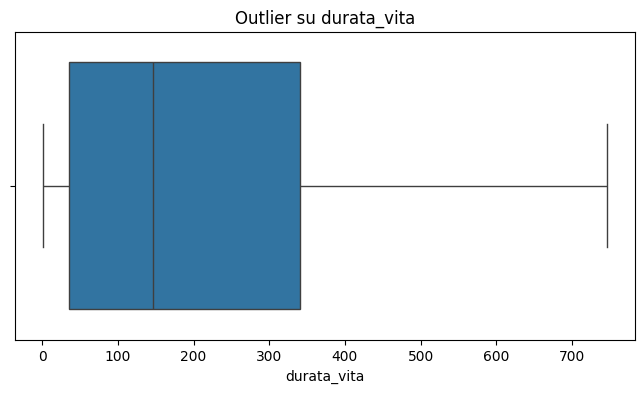

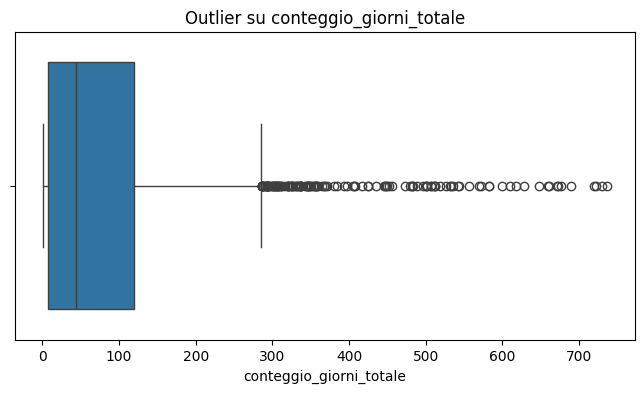

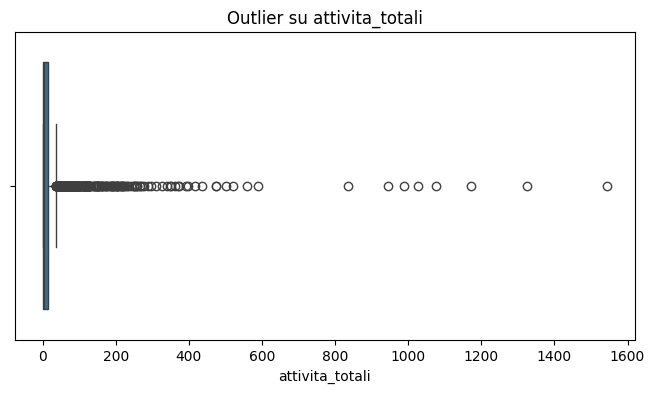

In [88]:

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4))
sns.boxplot(x=df['durata_vita'])
plt.title("Outlier su durata_vita")
plt.show()


plt.figure(figsize=(8, 4))
sns.boxplot(x=df['conteggio_giorni_totale'])
plt.title("Outlier su conteggio_giorni_totale")
plt.show()


plt.figure(figsize=(8, 4))
sns.boxplot(x=df['attivita_totali'])
plt.title("Outlier su attivita_totali")
plt.show()


In [89]:
# OUTLIER su durata_vita
Q1 = df['durata_vita'].quantile(0.25)
Q3 = df['durata_vita'].quantile(0.75)
IQR = Q3 - Q1
upper_durata = Q3 + 1.5 * IQR
df['is_outlier_durata'] = df['durata_vita'] > upper_durata

# OUTLIER su conteggio_giorni_totale
Q1 = df['conteggio_giorni_totale'].quantile(0.25)
Q3 = df['conteggio_giorni_totale'].quantile(0.75)
IQR = Q3 - Q1
upper_giorni = Q3 + 1.5 * IQR
df['is_outlier_giorni'] = df['conteggio_giorni_totale'] > upper_giorni

# OUTLIER su attivita_totali
Q1 = df['attivita_totali'].quantile(0.25)
Q3 = df['attivita_totali'].quantile(0.75)
IQR = Q3 - Q1
upper_attivita = Q3 + 1.5 * IQR
df['is_outlier_attivita'] = df['attivita_totali'] > upper_attivita



In [90]:
df[['is_outlier_durata', 'is_outlier_giorni', 'is_outlier_attivita']].sum()


,0
is_outlier_durata,0
is_outlier_giorni,133
is_outlier_attivita,315


**Comment**:
1. `durata_vita`:



* Outliers detected: 0

* The distribution is fairly compact, with no values exceeding the upper bound threshold. This indicates a consistent pattern in cookie lifespans across users.

2. `conteggio_giorni_totale`:

* Outliers detected: 133 users

* The boxplot reveals a long right tail with many values exceeding the IQR threshold (~150 days). These users show extended activity over time and represent an unusually persistent segment.

3. `attivita_totali`:

* Outliers detected: 315 users

* This is the most heavily skewed variable. A significant number of users exhibit exceptionally high activity, with some exceeding 1500 actions. These “power users” dominate the overall activity landscape and may require separate profiling or treatment.



## 3. **Exploratory Data Analysis (EDA)**

### 3.1 **Geographical KPIs**




#### The 10 most active users

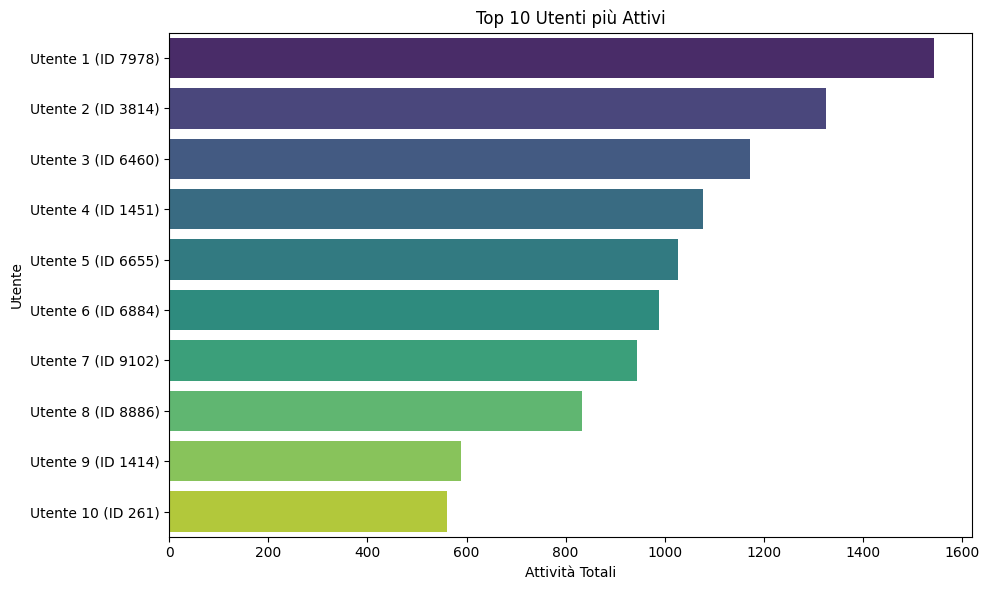

In [91]:
top_utenti = df[['id', 'attivita_totali']].sort_values(by='attivita_totali', ascending=False).head(10)
top_utenti['id'] = top_utenti['id'].astype(str)

import seaborn as sns
import matplotlib.pyplot as plt
top_utenti['utente_label'] = [
    f'Utente {i+1} (ID {uid})' for i, uid in enumerate(top_utenti['id'])
]



plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_utenti,
    x='attivita_totali',
    y='utente_label',
    hue='utente_label',
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title('Top 10 Utenti più Attivi')
plt.xlabel('Attività Totali')
plt.ylabel('Utente')
plt.tight_layout()
plt.show()

#### **Regional Insights: User Count, Average Activity, and Cookie Duration**

---



**User Count per Region**





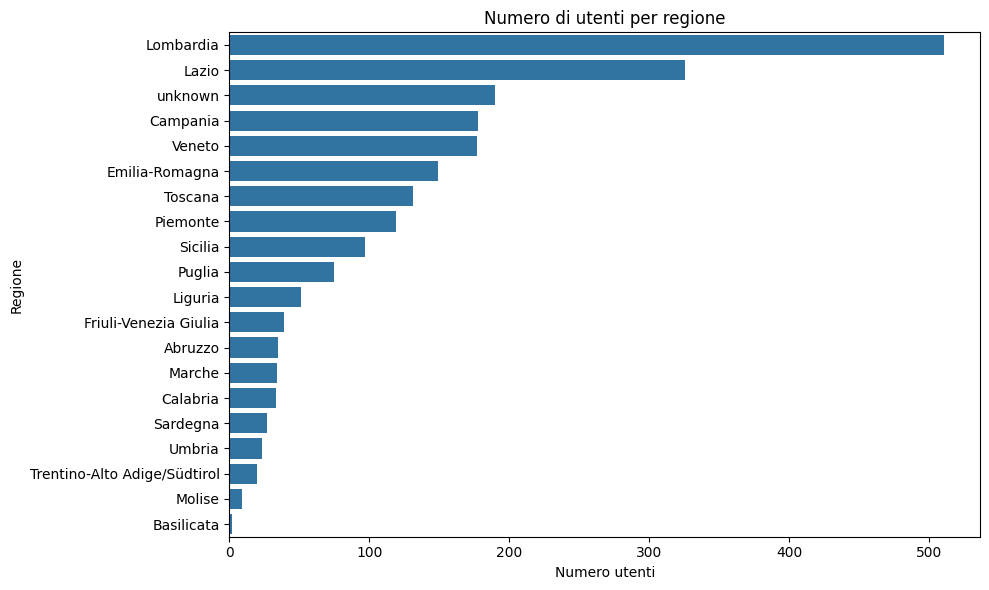

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='regione', order=df['regione'].value_counts().index)
plt.title("Numero di utenti per regione")
plt.xlabel("Numero utenti")
plt.ylabel("Regione")
plt.tight_layout()
plt.show()


**Key Features**:


*   *Lombardy* clearly has the highest number of users, followed by Lazio;
*   The "unknown" category is significant and worth investigating—possibly missing data or foreign users;
*   Southern regions like *Basilicata* and *Molise* show very low user representation.


**Average Activity per Region**

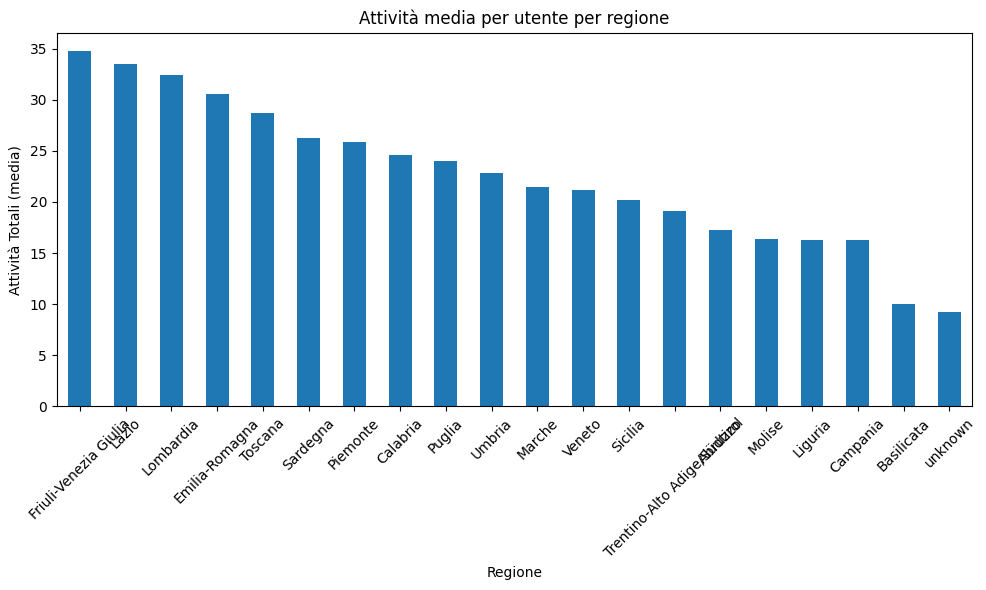

In [93]:
media_attivita = df.groupby('regione')['attivita_totali'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
media_attivita.plot(kind='bar')
plt.title("Attività media per utente per regione")
plt.ylabel("Attività Totali (media)")
plt.xlabel("Regione")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Features**:


*   Friuli-Venezia Giulia and Lazio have the highest user engagement;
*   Regions with fewer users (e.g., Basilicata, Molise) also show lower average activity;

**Cookie Duration per Region**

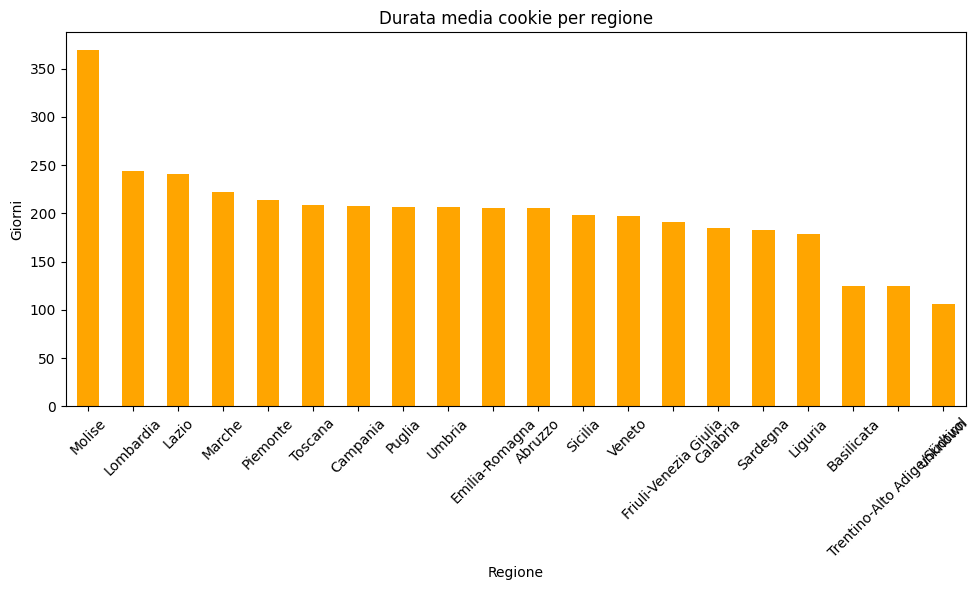

In [94]:
media_durata = df.groupby('regione')['durata_vita'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
media_durata.plot(kind='bar', color='orange')
plt.title("Durata media cookie per regione")
plt.ylabel("Giorni")
plt.xlabel("Regione")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Features**:


*   Molise surprisingly shows the longest cookie duration, suggesting more consistent or loyal users;
*   Central and Northern regions dominate the top of the ranking;
*   Some regions (like Trentino-Alto Adige) show much shorter durations—possibly due to brief or irregular visits.



#### **Top 15 Provinces by Users, Engagement, and Cookie Duration**

**User Count per Province**

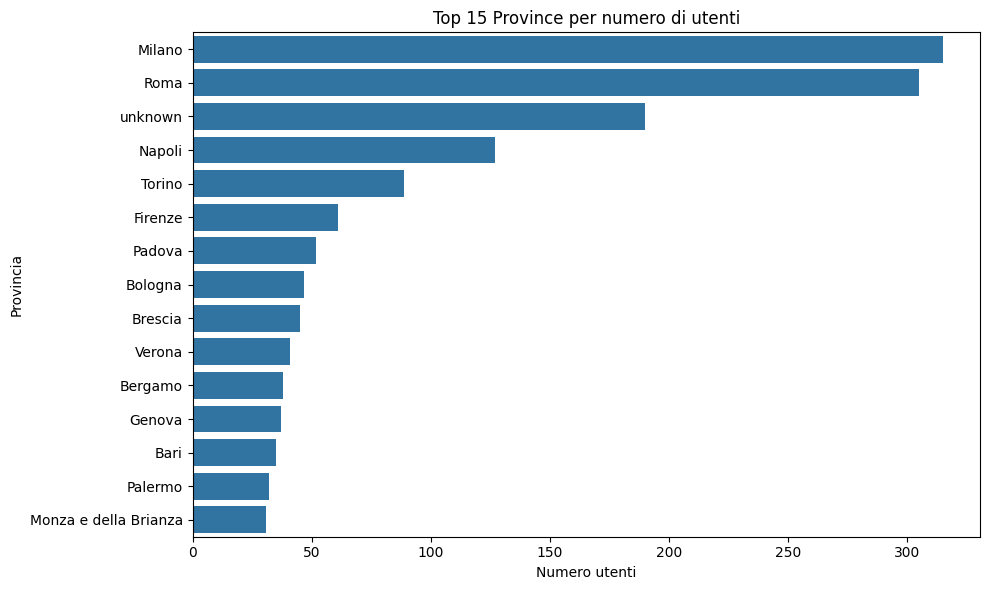

In [95]:
plt.figure(figsize=(10,6))
top_province = df['nome'].value_counts().head(15)

sns.barplot(x=top_province.values, y=top_province.index)
plt.title("Top 15 Province per numero di utenti")
plt.xlabel("Numero utenti")
plt.ylabel("Provincia")
plt.tight_layout()
plt.show()


**Key Features**:
*  Milano and Roma stand out as the provinces with the highest user counts;

*  The presence of “unknown” suggests missing or anonymized location data for many users;

*  Most of the top provinces are large urban areas with high population density.



**Average User Activity per Province**

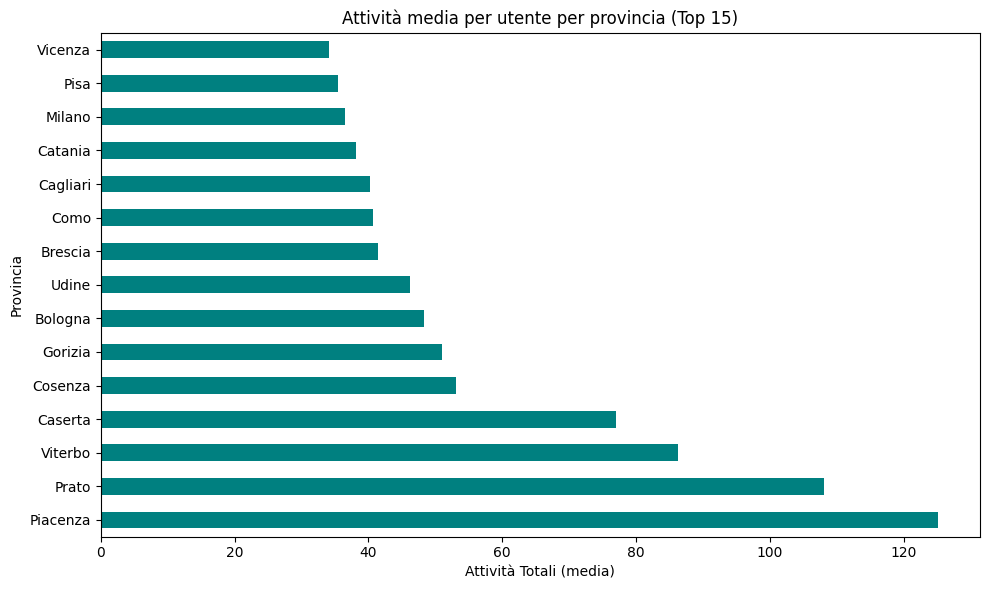

In [96]:
attivita_media_prov = df.groupby('nome')['attivita_totali'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
attivita_media_prov.plot(kind='barh', color='teal')
plt.title("Attività media per utente per provincia (Top 15)")
plt.xlabel("Attività Totali (media)")
plt.ylabel("Provincia")
plt.tight_layout()
plt.show()


**Key Features**:
* Piacenza, Prato, and Viterbo show the highest average activity per user:

* Surprisingly, these provinces are not the most populated, suggesting high user engagement;

* Urban areas like Milano and Bologna also show strong average engagement levels.

**Cookie Duration per Province**

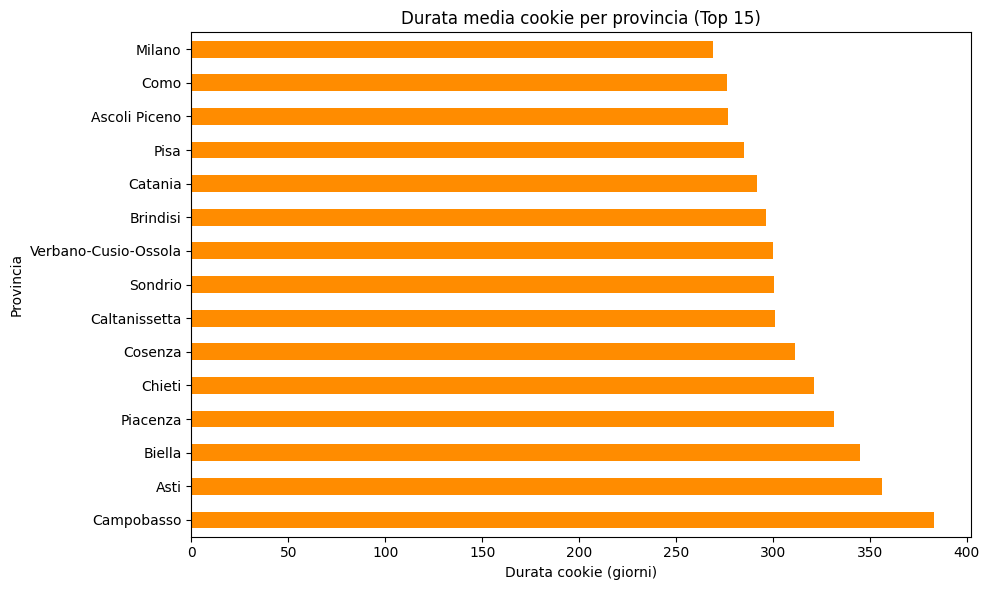

In [97]:
durata_media_prov = df.groupby('nome')['durata_vita'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
durata_media_prov.plot(kind='barh', color='darkorange')
plt.title("Durata media cookie per provincia (Top 15)")
plt.xlabel("Durata cookie (giorni)")
plt.ylabel("Provincia")
plt.tight_layout()
plt.show()


**Key Features**:
* Campobasso and Asti have the longest average cookie lifespan, close to 1 year;

* Several mid-size cities like Piacenza and Brindisi show strong cookie persistence;

* Provinces with longer cookie duration might indicate more consistent or loyal user behavior.

### 3.2 **Website Analysis**


#### **Top Websites by Total User Activity**

In [98]:
# Colonne che iniziano con "site_"
site_cols = [col for col in df.columns if col.startswith("site_")]

# Somma totale delle attività per sito
siti_visite = df[site_cols].sum().sort_values(ascending=False)
siti_visite.head(10)


,0
site_staseratv,11880
site_repubblica,10402
site_ansa,7704
site_gazzetta,6019
site_corriere,4402
site_corrieresport,3244
site_giallozafferano,3071
site_aranzulla,2144
site_subito,1688
site_sole24ore,1297


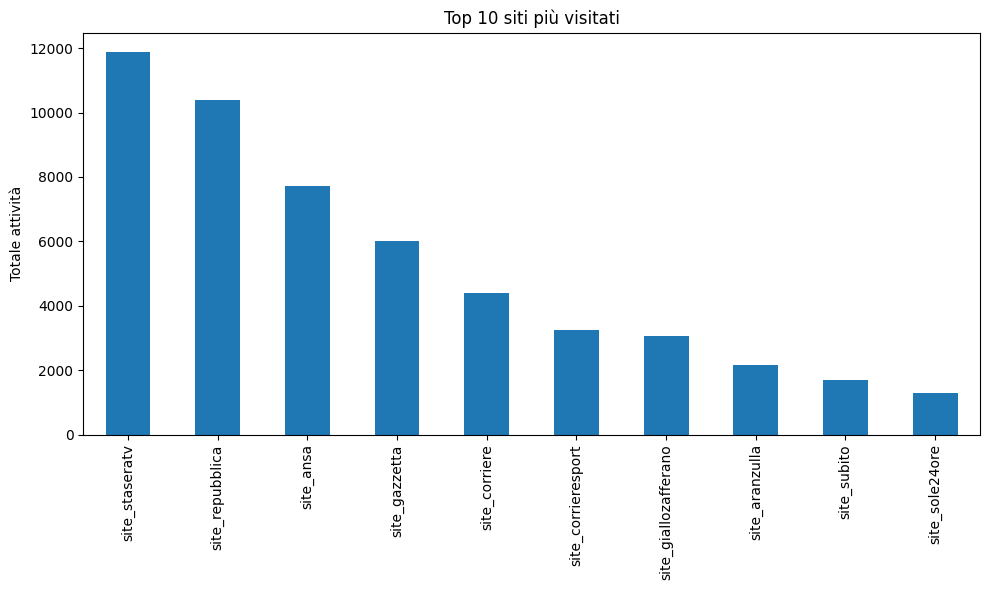

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
siti_visite.head(10).plot(kind='bar')
plt.title("Top 10 siti più visitati")
plt.ylabel("Totale attività")
plt.tight_layout()
plt.show()


In [100]:
siti_percentuali = (siti_visite / siti_visite.sum()) * 100
siti_percentuali.head(10).round(2)


,0
site_staseratv,20.81
site_repubblica,18.22
site_ansa,13.49
site_gazzetta,10.54
site_corriere,7.71
site_corrieresport,5.68
site_giallozafferano,5.38
site_aranzulla,3.75
site_subito,2.96
site_sole24ore,2.27


The chart shows that *site_staseraTv* and *site_repubblica* dominate user activity, accounting for over 39% of total visits. *Site_ansa* and *site_gazzetta* follow, while the remaining sites have a progressively lower engagement. This suggests that news and entertainment content are the most popular among users in the dataset.

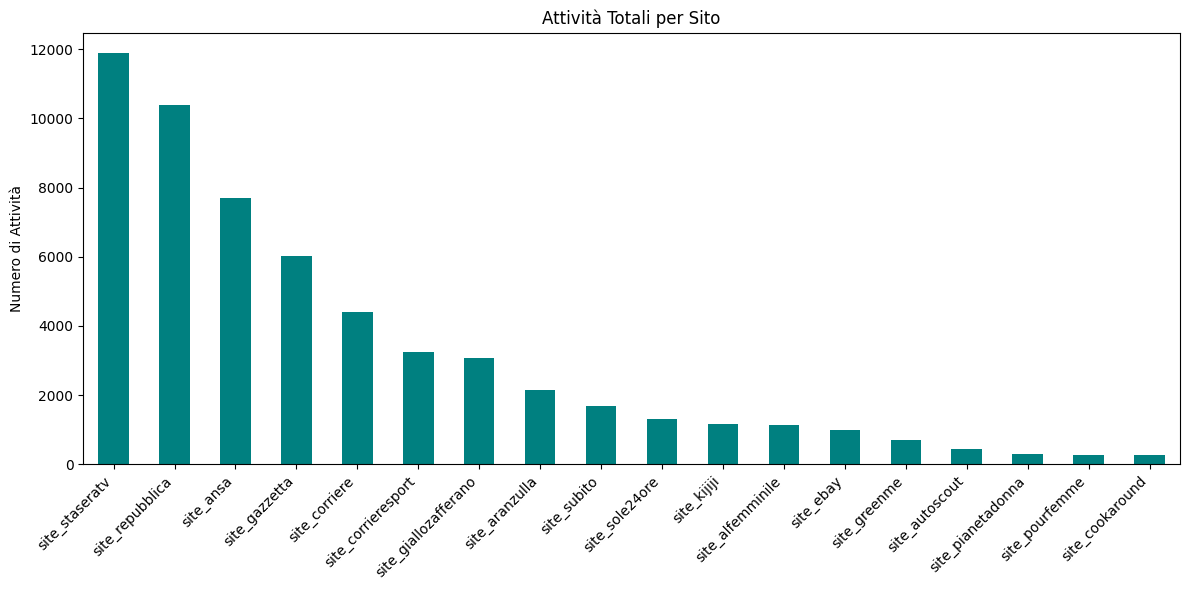

In [101]:
# Somma attività per sito
site_sums = df[site_cols].sum().sort_values(ascending=False)

# Grafico
plt.figure(figsize=(12, 6))
site_sums.plot(kind='bar', color='teal')
plt.title('Attività Totali per Sito')
plt.ylabel('Numero di Attività')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Average and Median Activity per Website**




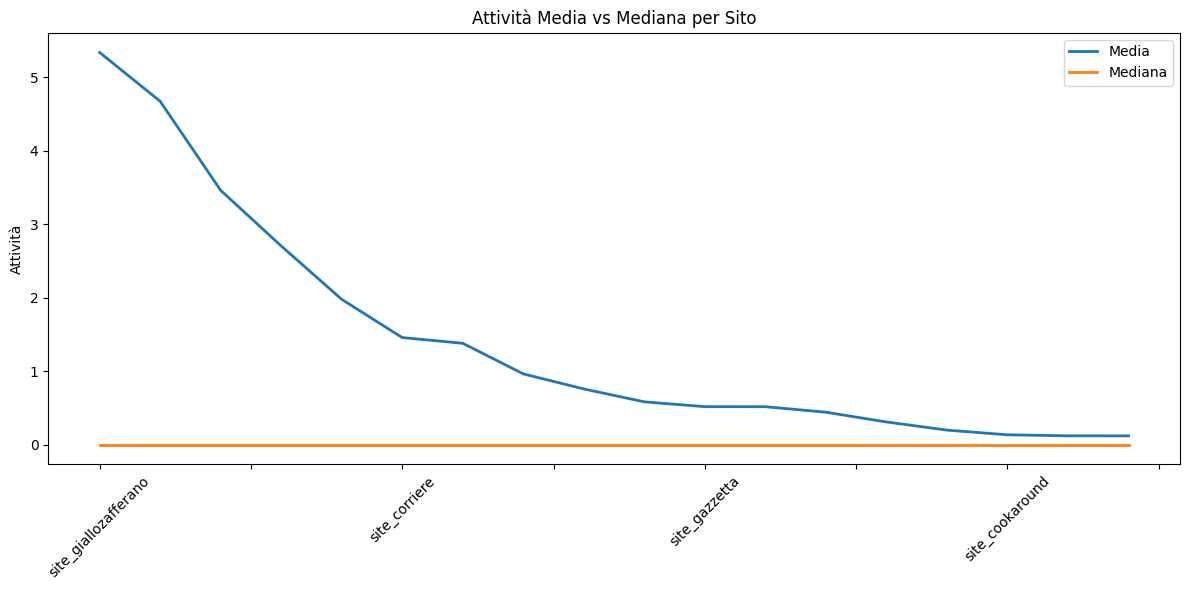

In [102]:
media_siti = df[site_cols].mean().sort_values(ascending=False)
mediana_siti = df[site_cols].median().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
media_siti.plot(label='Media', linewidth=2)
mediana_siti.plot(label='Mediana', linewidth=2)
plt.title('Attività Media vs Mediana per Sito')
plt.ylabel('Attività')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

This plot shows the comparison between the average (mean) and median activity across different websites. The blue line represents the mean activity, which decreases steadily across sites, indicating a few highly active sites skewing the average. The orange line, representing the median, stays consistently low, suggesting that most sites have relatively low activity and a few outliers significantly raise the mean. This highlights the presence of skewed data distribution.

#### **Top Visited Websites by Region**

In [103]:
site_per_regione = df.groupby('regione')[site_cols].sum()


In [104]:
top_sito_per_regione = site_per_regione.idxmax(axis=1)
top_sito_per_regione = top_sito_per_regione.reset_index().rename(columns={0: 'top_sito'})
top_sito_per_regione.head()


,regione,top_sito
0,Abruzzo,site_staseratv
1,Basilicata,site_sole24ore
2,Calabria,site_staseratv
3,Campania,site_staseratv
4,Emilia-Romagna,site_staseratv


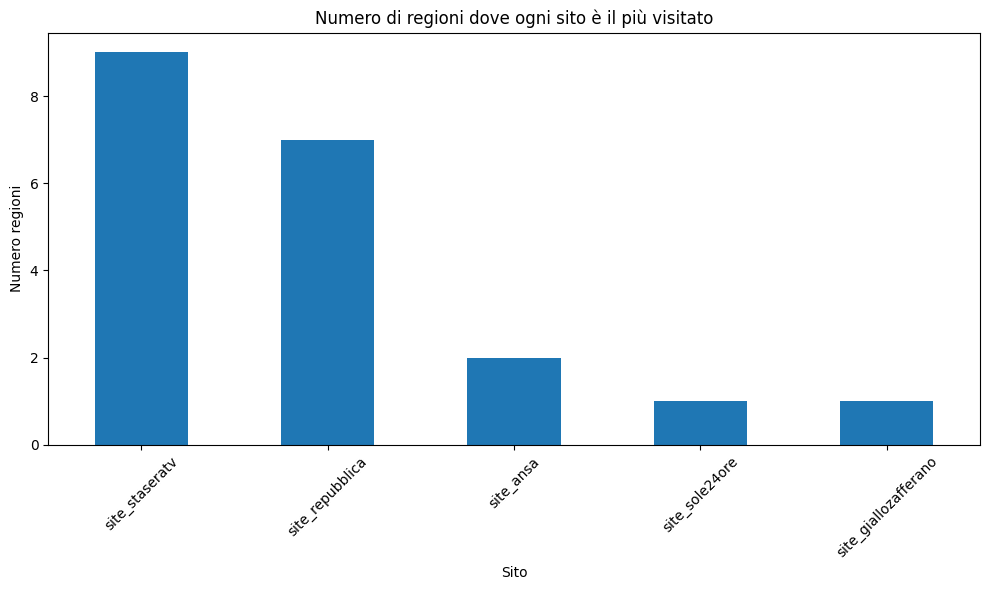

In [105]:
siti_vincenti = top_sito_per_regione['top_sito'].value_counts()

plt.figure(figsize=(10,6))
siti_vincenti.plot(kind='bar')
plt.title("Numero di regioni dove ogni sito è il più visitato")
plt.xlabel("Sito")
plt.ylabel("Numero regioni")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The chart reveals that site_staseratv is the most visited site in the largest number of regions, followed by site_repubblica. This suggests strong regional popularity and consistent user engagement for these platforms across Italy. Other sites like ansa and giallozafferano show more localized or niche popularity.

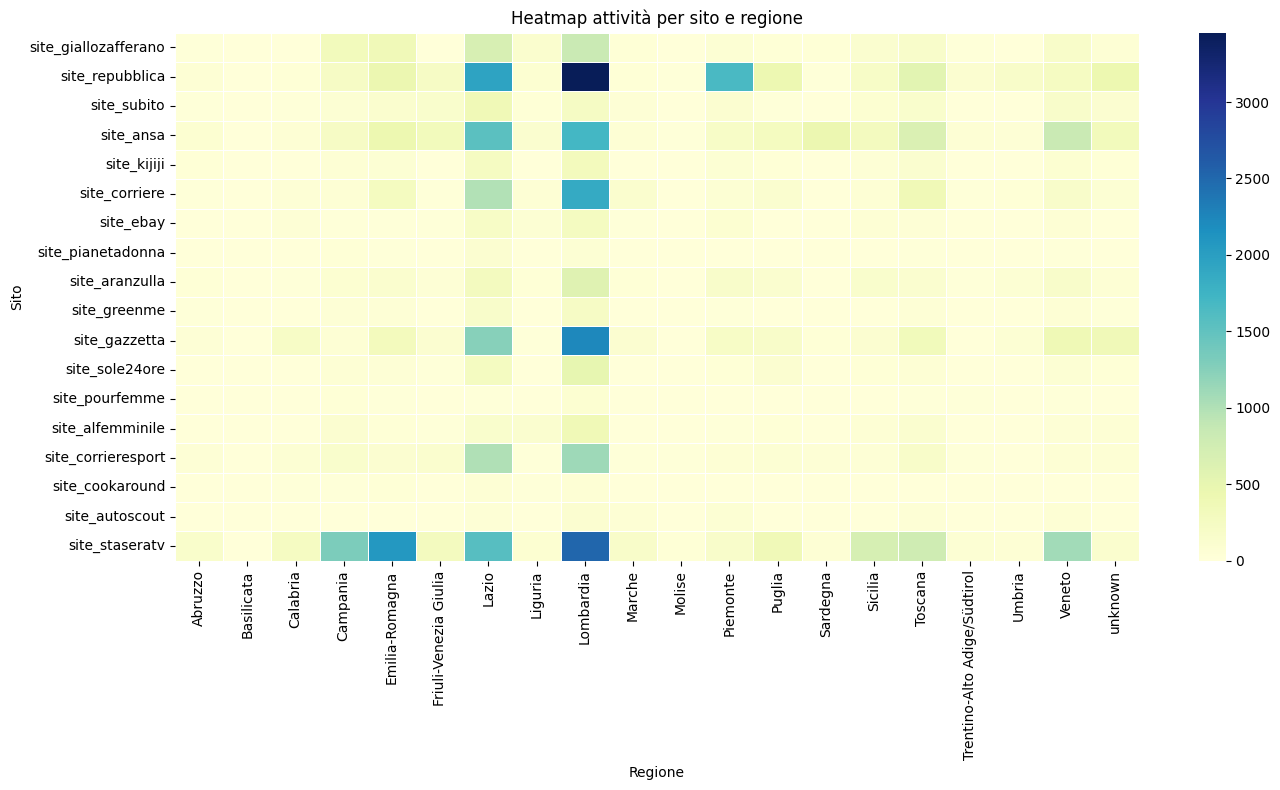

In [106]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(site_per_regione.T, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap attività per sito e regione")
plt.xlabel("Regione")
plt.ylabel("Sito")
plt.tight_layout()
plt.show()


The heatmap shows clear regional preferences in website activity. Site_staseratv*, *site_repubblica*, and *site_ansa* dominate in several regions, especially Lombardy, Lazio, and Campania. Meanwhile, other sites like *site_giallozafferano* or *site_kijiji* have more scattered or niche usage. This visualization highlights both national trends and regional content consumption differences.

#### **Top Visited Websites by Province**

In [107]:
site_per_provincia = df.groupby('nome')[site_cols].sum()


In [108]:
top_sito_per_provincia = site_per_provincia.idxmax(axis=1)
top_sito_per_provincia = top_sito_per_provincia.reset_index().rename(columns={0: 'top_sito'})


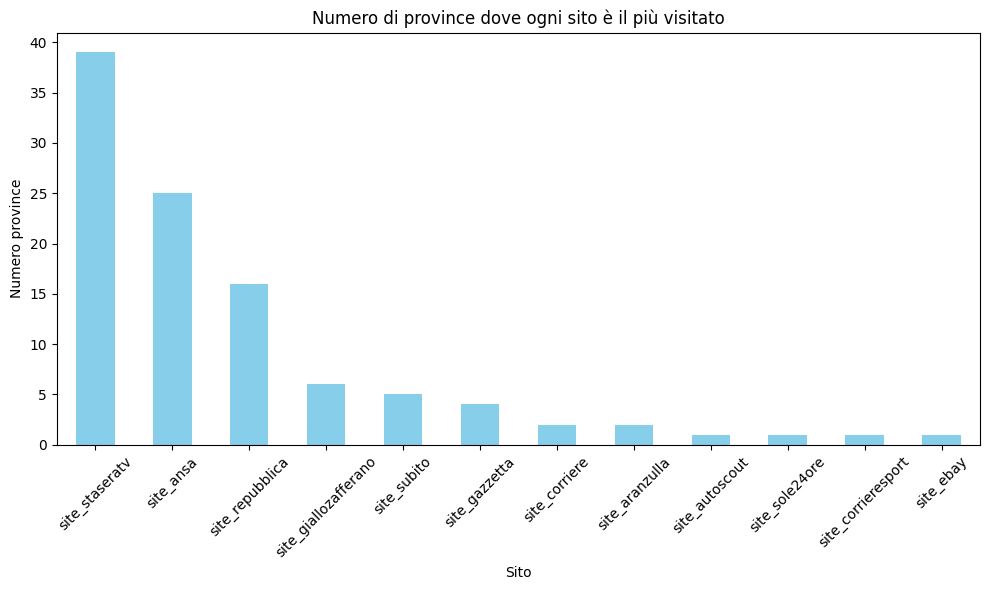

In [109]:
vittorie_siti_provincia = top_sito_per_provincia['top_sito'].value_counts()

plt.figure(figsize=(10,6))
vittorie_siti_provincia.plot(kind='bar', color='skyblue')
plt.title("Numero di province dove ogni sito è il più visitato")
plt.xlabel("Sito")
plt.ylabel("Numero province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart shows how many provinces have each site as the most visited one. *Site_staseraTV* clearly dominates, being the top site in over 40 provinces, followed by *site_ansa* and *site_repubblica*. The remaining sites have a much smaller regional impact, highlighting the strong nationwide appeal of the top three.

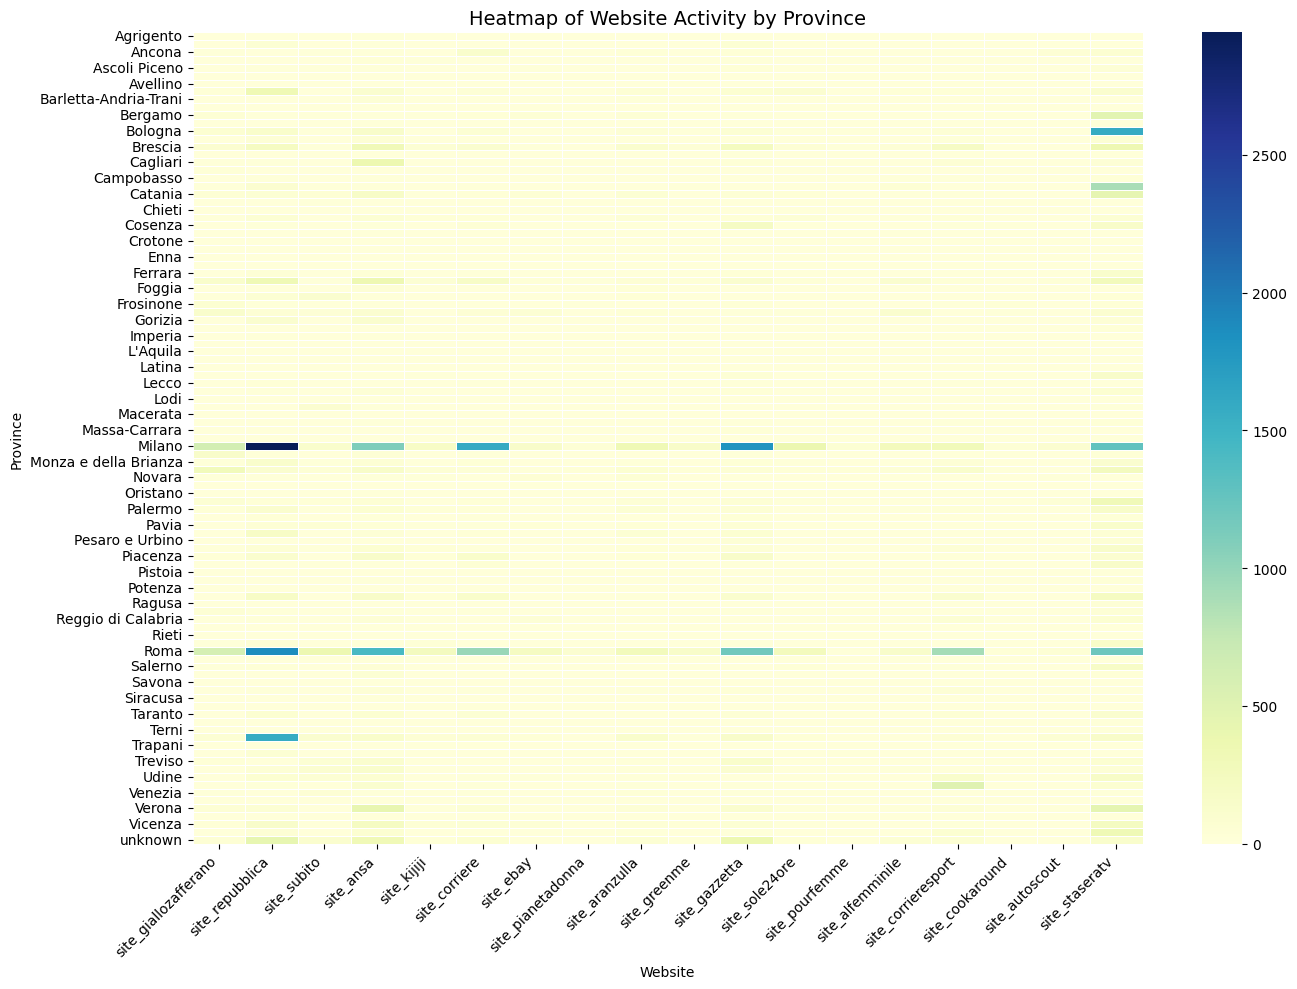

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the matrix: sum of activities per site per province
heatmap_data = df.groupby("nome")[site_cols].sum()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Website Activity by Province", fontsize=14)
plt.xlabel("Website")
plt.ylabel("Province")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This heatmap displays website activity across Italian provinces. It reveals clear spikes in activity in areas like Roma, Milano, especially on sites such as site_staseraTV and site_repubblica. Overall, the activity is highly concentrated in a few urban centers, while many provinces show limited engagement.

#### **Top Visited Websites by Device Type**

In [111]:
df['device'] = df['device'].str.strip().str.title()

df = df[df['device'].notna()]

site_per_device = df.groupby('device')[site_cols].sum()


top_sito_per_device = site_per_device.idxmax(axis=1).reset_index().rename(columns={0: 'top_sito'})

display(top_sito_per_device)



,device,top_sito
0,Desktop And Laptop,site_repubblica
1,Mobile,site_staseratv
2,Tablet,site_repubblica
3,Unknown,site_repubblica


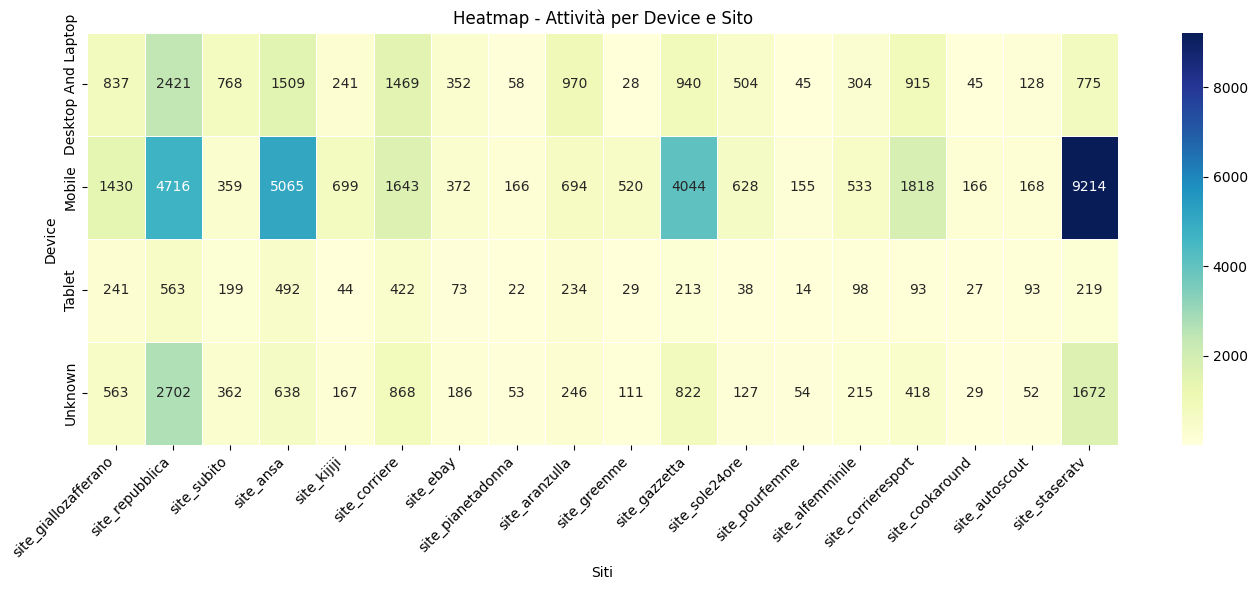

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns


df['device'] = df['device'].str.strip().str.title()

heatmap_data = df.groupby('device')[site_cols].sum()

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='g')
plt.title('Heatmap - Attività per Device e Sito')
plt.xlabel('Siti')
plt.ylabel('Device')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The heatmap reveals that mobile devices dominate user activity across almost all top websites, especially for site_staseraTV, site_ansa, and site_gazzetta. Desktop and laptop users also show strong engagement on site_repubblica, while tablets have overall lower activity across the board. The "Unknown" category displays moderate traffic, particularly on site_repubblica and site_staseraTV.
This suggests mobile optimization is crucial for top-performing sites, as the majority of engagement happens via smartphones.

### 3.3 **Analysis of preferred browsers and operating systems**

#### **Browser and Operating System Preferences**

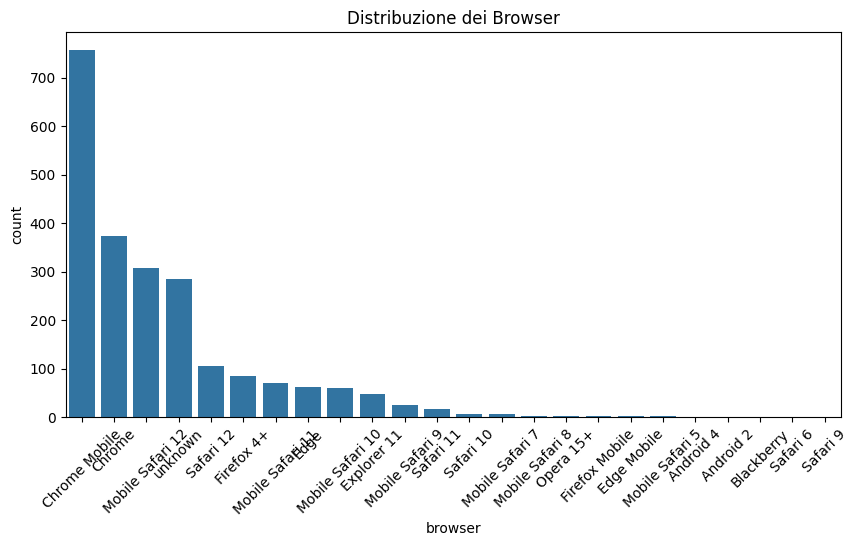

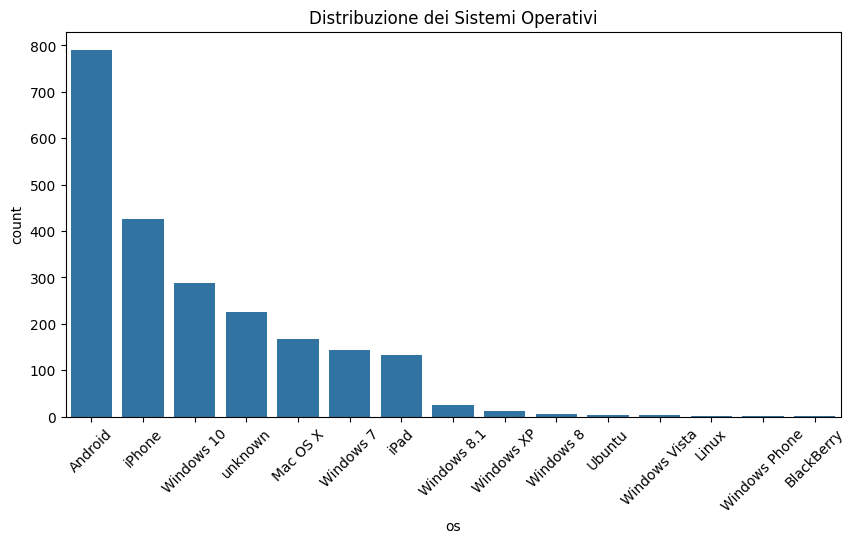

In [113]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='browser', order=df['browser'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribuzione dei Browser')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='os', order=df['os'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribuzione dei Sistemi Operativi')
plt.show()


The majority of users access content via Chrome and Mobile Chrome, highlighting the dominance of Google’s browser. On the OS side, Android and iPhone lead by a large margin, confirming the strong prevalence of mobile usage in this dataset. Traditional desktop operating systems like Windows 10 and macOS follow behind, with older systems and Linux representing a minor share.

#### **Operating System Distribution by Device Type**



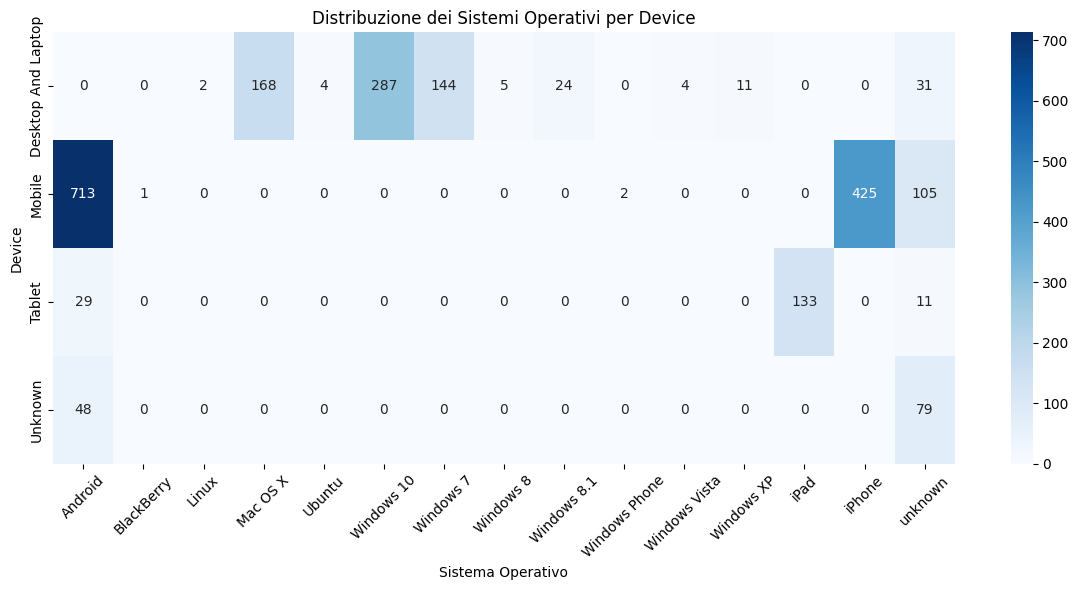

In [114]:
os_per_device = df.groupby(['device', 'os']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(os_per_device, annot=True, fmt='g', cmap="Blues")
plt.title("Distribuzione dei Sistemi Operativi per Device")
plt.xlabel("Sistema Operativo")
plt.ylabel("Device")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This heatmap shows a clear segmentation: Android dominates on Mobile, while Windows 10 and Windows 7 are most used on Desktop and Laptop. iOS (iPhone and iPad) stands out among Mobile and Tablet devices. The distribution confirms expected usage patterns, with minimal crossover between operating systems and device types.

#### **Browser Distribution by Device Type**

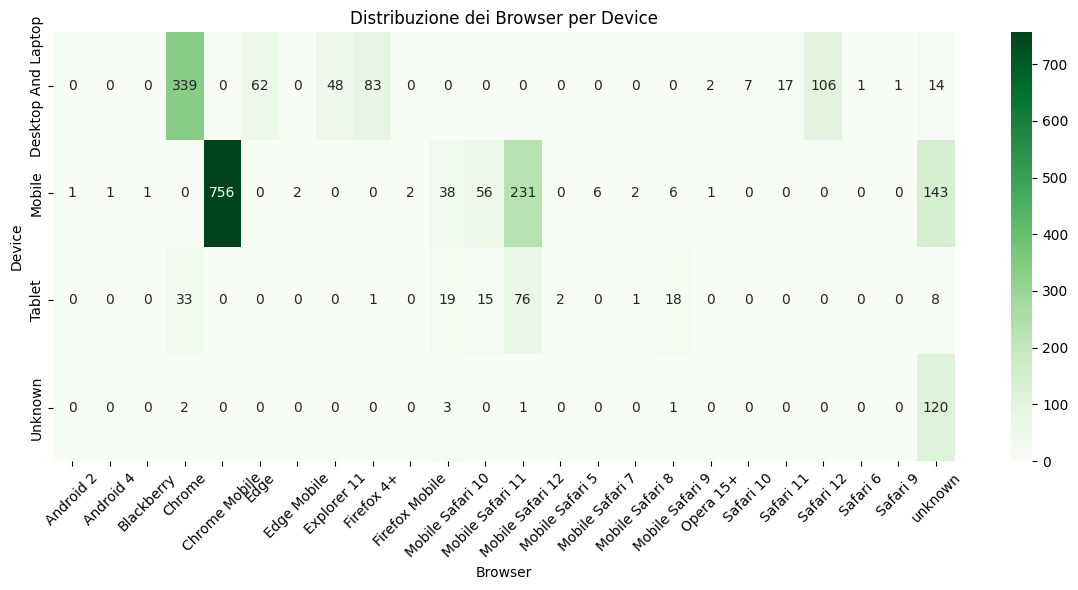

In [116]:

browser_per_device = df.groupby(['device', 'browser']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(browser_per_device, annot=True, fmt='g', cmap="Greens")
plt.title("Distribuzione dei Browser per Device")
plt.xlabel("Browser")
plt.ylabel("Device")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This heatmap shows that Mobile Chrome dominates on mobile devices, while Chrome is the most used browser on desktops and laptops. Tablets display a more diverse browser usage, with a strong presence of Mobile Safari. Overall, browser preference is strongly tied to the type of device being used.

In [117]:
df.to_csv("final_dataset.csv", index=False)


In [118]:
from google.colab import files
files.download("final_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:

site_cols = [col for col in df.columns if col.startswith("site_")]


df_long = df.melt(
    id_vars=['id'],
    value_vars=site_cols,
    var_name='sito',
    value_name='attivita'
)

df_long = df_long[df_long['attivita'] > 0]


df_long.to_csv("dataset_long_siti.csv", index=False)


In [120]:
from google.colab import files
files.download("dataset_long_siti.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:

df_top_sites_by_region = top_sito_per_regione['top_sito'].value_counts().reset_index()
df_top_sites_by_region.columns = ['sito', 'num_regioni']
df_top_sites_by_region.to_csv("siti_top_regioni.csv", index=False, sep=";")


In [125]:
from google.colab import files
files.download("siti_top_regioni.csv")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
site_cols = [col for col in df.columns if col.startswith('site_')]
df_heatmap = df.groupby('regione')[site_cols].sum().reset_index()
df_long_heatmap = df_heatmap.melt(id_vars='regione', var_name='sito', value_name='attivita')
df_long_heatmap = df_long_heatmap[df_long_heatmap['attivita'] > 0]
df_long_heatmap.to_csv("heatmap_sito_regione.csv", index=False)


In [127]:
from google.colab import files
files.download("heatmap_sito_regione.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:

site_cols = [col for col in df.columns if col.startswith("site_")]
site_per_province = df.groupby('nome')[site_cols].sum()  # 'nome' = provincia
top_site_per_province = site_per_province.idxmax(axis=1).reset_index()
top_site_per_province.columns = ['provincia', 'top_sito']


site_win_counts_prov = top_site_per_province['top_sito'].value_counts().reset_index()
site_win_counts_prov.columns = ['sito', 'num_province']


site_win_counts_prov.to_csv("siti_top_province.csv", index=False, sep=";")


In [131]:
from google.colab import files
files.download("siti_top_province.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [132]:

site_per_provincia = df.groupby('nome')[site_cols].sum().reset_index()


df_heatmap_province = site_per_provincia.melt(id_vars='nome', var_name='sito', value_name='attivita')
df_heatmap_province = df_heatmap_province[df_heatmap_province['attivita'] > 0]


df_heatmap_province.to_csv("heatmap_sito_provincia.csv", index=False, sep=";")


In [133]:
from google.colab import files
files.download("heatmap_sito_provincia.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [135]:

heatmap_data = df.groupby('device')[site_cols].sum().reset_index()


df_device_heatmap = heatmap_data.melt(id_vars='device', var_name='sito', value_name='attivita')
df_device_heatmap = df_device_heatmap[df_device_heatmap['attivita'] > 0]


df_device_heatmap.to_csv("heatmap_device_sito.csv", index=False, sep=";")


In [136]:
from google.colab import files
files.download("heatmap_device_sito.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [138]:
os_per_device = df.groupby(['device', 'os']).size().reset_index(name='conteggio')


os_per_device.to_csv("heatmap_os_device.csv", index=False, sep=";")


In [139]:
from google.colab import files
files.download("heatmap_os_device.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:

browser_per_device = df.groupby(['device', 'browser']).size().reset_index(name='conteggio')


browser_per_device.to_csv("heatmap_browser_device.csv", index=False, sep=";")


In [141]:
from google.colab import files
files.download("heatmap_browser_device.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>